<a href="https://colab.research.google.com/github/Viswanath-621/Water-Pollution-detection/blob/main/epics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [2]:
def prepare_data(timeseries_data, n_features):
  X,y = [],[]
  for i in range(len(timeseries_data)):
    end_ix = i+n_features
    if end_ix > len(timeseries_data)-1:
      break
    seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [4]:
from google.colab import files 
import pandas as pd
import io
uploaded = files.upload()

df = pd.read_csv(io.BytesIO(uploaded['epics-csv.csv']))


Saving epics-csv.csv to epics-csv.csv


In [5]:
df['date'] = pd.date_range(start='1/1/2019', periods=len(df), freq='D')

In [6]:
s = 0.0
x = 0
for i in range(len(df["Temp"])):
  if df["Temp"][i] != int(-9999):
    s+=df["Temp"][i]
    #print(s,x)
    x+=1
#print(s/x)
tt = s/x
for i in range(len(df["Temp"])):
  if df["Temp"][i] == int(-9999):
    df["Temp"][i] = tt
    #print(s,x)
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,id,Chlorophyll,Temp,date
0,1,1.063497,26.72500,2019-01-01
1,2,2.938943,27.03750,2019-01-02
2,3,1.192086,27.35000,2019-01-03
3,4,-32767.000000,28.28750,2019-01-04
4,5,1.827132,26.63858,2019-01-05
...,...,...,...,...
1119,1120,2.680770,23.66250,2022-01-24
1120,1121,2.081368,26.63858,2022-01-25
1121,1122,2.419194,23.97500,2022-01-26
1122,1123,1.853720,24.28750,2022-01-27


In [7]:
temp_data = df['Temp']
n_steps = 3
X,y = prepare_data(temp_data, n_steps)

In [8]:
print(X,y)

[[26.7250004  27.0375004  27.3500004 ]
 [27.0375004  27.3500004  28.2875004 ]
 [27.3500004  28.2875004  26.63857965]
 ...
 [26.63857965 23.6625004  26.63857965]
 [23.6625004  26.63857965 23.9750004 ]
 [26.63857965 23.9750004  24.2875004 ]] [28.2875004  26.63857965 27.1625004  ... 23.9750004  24.2875004
 24.3500004 ]


In [9]:
X.shape, y.shape

((1121, 3), (1121,))

In [10]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [11]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer="adam", loss='mse')
model.fit(X,y,epochs=300,verbose=1)

Epoch 1/300
36/36 [==============================] - 3s 5ms/step - loss: 413.6203
Epoch 2/300
36/36 [==============================] - 0s 4ms/step - loss: 7.0636
Epoch 3/300
36/36 [==============================] - 0s 5ms/step - loss: 1.9703
Epoch 4/300
36/36 [==============================] - 0s 5ms/step - loss: 1.8354
Epoch 5/300
36/36 [==============================] - 0s 5ms/step - loss: 1.7667
Epoch 6/300
36/36 [==============================] - 0s 5ms/step - loss: 1.7576
Epoch 7/300
36/36 [==============================] - 0s 5ms/step - loss: 1.7361
Epoch 8/300
36/36 [==============================] - 0s 5ms/step - loss: 1.6619
Epoch 9/300
36/36 [==============================] - 0s 5ms/step - loss: 1.8062
Epoch 10/300
36/36 [==============================] - 0s 5ms/step - loss: 1.6304
Epoch 11/300
36/36 [==============================] - 0s 5ms/step - loss: 1.5754
Epoch 12/300
36/36 [==============================] - 0s 5ms/step - loss: 1.6030
Epoch 13/300
36/36 [===============

In [12]:
x_input = np.array([26.7250, 27.0375, 27.3500])
temp_input = list(x_input)
lst_output = []
i = 0
while(i<30):
  if(len(temp_input)>3):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    #print(x_input())
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose = 0)
    print("{} day output{}".format(i,yhat))
    temp_input.append(yhat[0][0])
    temp_input = temp_input[1:]
    lst_output.append(yhat[0][0])
    i = i+1
  else:
    x_input = x_input.reshape((1,n_steps,n_features))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.append(yhat[0][0])
    lst_output.append(yhat[0][0])
    i = i+1
print(lst_output)

[27.361858]
1 day input [27.0375     27.35       27.36185837]
1 day output[[27.58921]]
2 day input [27.35       27.36185837 27.58921051]
2 day output[[27.651789]]
3 day input [27.361858 27.58921  27.651789]
3 day output[[27.8049]]
4 day input [27.58921  27.651789 27.8049  ]
4 day output[[27.882244]]
5 day input [27.651789 27.8049   27.882244]
5 day output[[27.99445]]
6 day input [27.8049   27.882244 27.99445 ]
6 day output[[28.069662]]
7 day input [27.882244 27.99445  28.069662]
7 day output[[28.156681]]
8 day input [27.99445  28.069662 28.156681]
8 day output[[28.224049]]
9 day input [28.069662 28.156681 28.224049]
9 day output[[28.293768]]
10 day input [28.156681 28.224049 28.293768]
10 day output[[28.351976]]
11 day input [28.224049 28.293768 28.351976]
11 day output[[28.408842]]
12 day input [28.293768 28.351976 28.408842]
12 day output[[28.458265]]
13 day input [28.351976 28.408842 28.458265]
13 day output[[28.505075]]
14 day input [28.408842 28.458265 28.505075]
14 day output[[28

In [13]:
import matplotlib.pyplot as plt

In [14]:
day_new = df["date"]
day_pred = pd.date_range(start='1/28/2022', periods=30, freq='D')
day_new.shape, temp_data.shape

((1124,), (1124,))

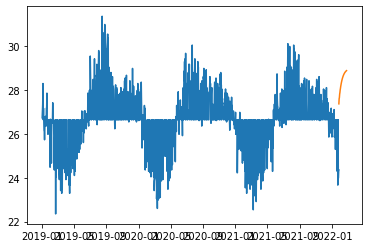

In [15]:
plt.plot(day_new, temp_data)
plt.plot(day_pred, lst_output)

In [16]:
df

,id,Chlorophyll,Temp,date
0,1,1.063497,26.72500,2019-01-01
1,2,2.938943,27.03750,2019-01-02
2,3,1.192086,27.35000,2019-01-03
3,4,-32767.000000,28.28750,2019-01-04
4,5,1.827132,26.63858,2019-01-05
...,...,...,...,...
1119,1120,2.680770,23.66250,2022-01-24
1120,1121,2.081368,26.63858,2022-01-25
1121,1122,2.419194,23.97500,2022-01-26
1122,1123,1.853720,24.28750,2022-01-27


In [17]:
df.describe(percentiles=None, include=None, exclude=None)

,id,Chlorophyll,Temp
count,1124.000000,1124.000000,1124.000000
mean,562.500000,-8452.933555,26.638580
std,324.615157,14343.886875,1.426409
min,1.000000,-32767.000000,22.350000
25%,281.750000,-32767.000000,26.162500
50%,562.500000,1.158972,26.638580
75%,843.250000,1.620973,27.475000
max,1124.000000,16.610281,31.350000


Chlorophyll

In [18]:
s = 0.0
x = 0
for i in range(len(df["Chlorophyll"])):
  if df["Chlorophyll"][i] != int(-32767):
    s+=df["Chlorophyll"][i]
    #print(s,x)
    x+=1
#print(s/x)
yy = s/x
for i in range(len(df["Chlorophyll"])):
  if df["Chlorophyll"][i] == int(-32767):
    df["Chlorophyll"][i] = yy
    #print(s,x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [19]:
temp_data = df['Chlorophyll']
n_steps = 3
X,y = prepare_data(temp_data, n_steps)
X,y

(array([[1.06349707, 2.93894339, 1.19208646],
        [2.93894339, 1.19208646, 1.59794236],
        [1.19208646, 1.59794236, 1.82713246],
        ...,
        [3.94451523, 2.68077016, 2.08136821],
        [2.68077016, 2.08136821, 2.41919446],
        [2.08136821, 2.41919446, 1.85372043]]),
 array([1.59794236, 1.82713246, 2.70455241, ..., 2.41919446, 1.85372043,
        1.16371453]))

In [20]:
X.shape,y.shape

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

X.shape,y.shape

((1121, 3, 1), (1121,))

In [21]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer="adam", loss='mse')
model.fit(X,y,epochs=300,verbose=1)

Epoch 1/300
36/36 [==============================] - 2s 4ms/step - loss: 3.1378
Epoch 2/300
36/36 [==============================] - 0s 4ms/step - loss: 2.2324
Epoch 3/300
36/36 [==============================] - 0s 4ms/step - loss: 1.4982
Epoch 4/300
36/36 [==============================] - 0s 4ms/step - loss: 1.2910
Epoch 5/300
36/36 [==============================] - 0s 5ms/step - loss: 1.1582
Epoch 6/300
36/36 [==============================] - 0s 4ms/step - loss: 1.1062
Epoch 7/300
36/36 [==============================] - 0s 5ms/step - loss: 1.0769
Epoch 8/300
36/36 [==============================] - 0s 5ms/step - loss: 1.0735
Epoch 9/300
36/36 [==============================] - 0s 5ms/step - loss: 1.0813
Epoch 10/300
36/36 [==============================] - 0s 4ms/step - loss: 1.0739
Epoch 11/300
36/36 [==============================] - 0s 5ms/step - loss: 1.0696
Epoch 12/300
36/36 [==============================] - 0s 4ms/step - loss: 1.0695
Epoch 13/300
36/36 [=================

In [22]:
x_input = np.array([1.06349707, 2.93894339, 1.19208646])
temp_input = list(x_input)
lst_output = []
i = 0
while(i<30):
  if(len(temp_input)>3):
    x_input = np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    #print(x_input())
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose = 0)
    print("{} day output{}".format(i,yhat))
    temp_input.append(yhat[0][0])
    temp_input = temp_input[1:]
    lst_output.append(yhat[0][0])
    i = i+1
  else:
    x_input = x_input.reshape((1,n_steps,n_features))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.append(yhat[0][0])
    lst_output.append(yhat[0][0])
    i = i+1
print(lst_output)

[1.8172631]
1 day input [2.93894339 1.19208646 1.81726313]
1 day output[[2.2185805]]
2 day input [1.19208646 1.81726313 2.21858048]
2 day output[[1.895629]]
3 day input [1.8172631 2.2185805 1.895629 ]
3 day output[[1.6496458]]
4 day input [2.2185805 1.895629  1.6496458]
4 day output[[1.444678]]
5 day input [1.895629  1.6496458 1.444678 ]
5 day output[[1.3643417]]
6 day input [1.6496458 1.444678  1.3643417]
6 day output[[1.3394314]]
7 day input [1.444678  1.3643417 1.3394314]
7 day output[[1.3280295]]
8 day input [1.3643417 1.3394314 1.3280295]
8 day output[[1.324709]]
9 day input [1.3394314 1.3280295 1.324709 ]
9 day output[[1.3232894]]
10 day input [1.3280295 1.324709  1.3232894]
10 day output[[1.3228574]]
11 day input [1.324709  1.3232894 1.3228574]
11 day output[[1.3226757]]
12 day input [1.3232894 1.3228574 1.3226757]
12 day output[[1.3226165]]
13 day input [1.3228574 1.3226757 1.3226165]
13 day output[[1.3225911]]
14 day input [1.3226757 1.3226165 1.3225911]
14 day output[[1.32258

In [23]:
import matplotlib.pyplot as plt
day_new = df["date"]
day_pred = pd.date_range(start='1/28/2022', periods=30, freq='D')
day_new.shape, temp_data.shape

((1124,), (1124,))

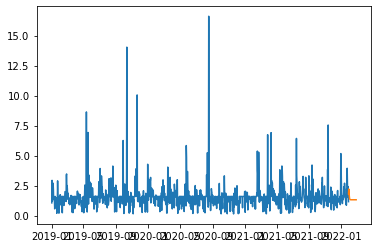

In [24]:
plt.plot(day_new, temp_data)
plt.plot(day_pred, lst_output)